# An Adaptive Machine Learning Model for  Dynamic Pricing in E-Commerce Websites:  Heuristic Model
### Karmanya Aggarwal,
#### Team Members : Hitkul Jangra, Anuj Baid

## Brief Recap of Goals/Motivations
1. Idea was to develop an adaptive machine learning model for dynamic pricing in ecommerce websites that used customer modeling. 
2. We want to determine highest price that the customer is willing to pay for a product within a vendor set min-max range. 
3. Originally planned 3 models. 

## Literature Review
1. No-one published a combination of customer and demand models. 
2. Customer modelling itself hasn't been done very much though demand modelling is very well explored
3. Shakya Paper - sigmoid activation, each neuron in NN was given a demand function (Linear, exponential etc) and a GA for the weights. 

## Methodology Used
1. Demand model is used to give a price floor - Hitkul will talk/will have talked about this
2. Heuristic Model divides the user into 3 price brackets and we have 3 price brackets the demand floor, the vendor max and the average of the two and we map the user's propensity to spend bracket to one of these three. 

## What's Changed Since Mid Sem
1. 1 customer model instead of 2
2. Customer model is Heuristic based instead of Naive Bayes
3. No App Integration

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
# Imports

In [3]:
df = pd.read_csv("PossibleDataSets/india-districts-census-2011.csv")
# Read Census Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Columns: 118 entries, District code to Total_Power_Parity
dtypes: int64(116), object(2)
memory usage: 590.1+ KB


Info tells us we don't need to process our dataset at all. That's quite nice. 

In [4]:
df.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,...,786.046875,1696.456250,294.000000,215.300000,509.300000,194.204688,261.245313,455.450000,279.631250,3315.412500
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,...,1038.854733,1720.535151,638.345281,362.684243,968.538748,424.108001,587.279450,1007.364839,1050.934537,4638.568719
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,...,236.750000,589.000000,59.000000,24.750000,95.000000,19.000000,21.000000,44.000000,18.000000,1024.250000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,5.483525e+05,4.038590e+05,2.460160e+05,1.255485e+05,1.178550e+05,...,518.000000,1220.500000,149.000000,118.500000,278.000000,84.000000,85.500000,186.500000,60.500000,2238.500000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,9.188582e+05,6.641550e+05,4.477078e+05,2.284602e+05,2.140502e+05,...,941.250000,2233.250000,296.500000,262.000000,564.500000,213.250000,293.000000,497.000000,215.500000,3959.000000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,10334.000000,13819.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


Quick qualitative stats

In [5]:
df.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU & KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU & KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU & KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU & KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU & KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [6]:
list(df.columns.values)

['District code',
 'State name',
 'District name',
 'Population',
 'Male',
 'Female',
 'Literate',
 'Male_Literate',
 'Female_Literate',
 'SC',
 'Male_SC',
 'Female_SC',
 'ST',
 'Male_ST',
 'Female_ST',
 'Workers',
 'Male_Workers',
 'Female_Workers',
 'Main_Workers',
 'Marginal_Workers',
 'Non_Workers',
 'Cultivator_Workers',
 'Agricultural_Workers',
 'Household_Workers',
 'Other_Workers',
 'Hindus',
 'Muslims',
 'Christians',
 'Sikhs',
 'Buddhists',
 'Jains',
 'Others_Religions',
 'Religion_Not_Stated',
 'LPG_or_PNG_Households',
 'Housholds_with_Electric_Lighting',
 'Households_with_Internet',
 'Households_with_Computer',
 'Rural_Households',
 'Urban_Households',
 'Households',
 'Below_Primary_Education',
 'Primary_Education',
 'Middle_Education',
 'Secondary_Education',
 'Higher_Education',
 'Graduate_Education',
 'Other_Education',
 'Literate_Education',
 'Illiterate_Education',
 'Total_Education',
 'Age_Group_0_29',
 'Age_Group_30_49',
 'Age_Group_50',
 'Age not stated',
 'Househol

In [7]:
df[df['District name']=='South'] #df.loc[] shorthand

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
97,98,NCT OF DELHI,South,2731929,1467428,1264501,2078402,1185036,893366,422926,...,1903,3584,589,582,1171,482,567,1049,769,7151


In [8]:
ParityCols = [col for col in df.columns.values if "Power_Parity_" in col]
# Simple list comprehension that selects the parity columns

In [9]:
divided = df[ParityCols].divide(df.Total_Power_Parity,axis=0)
# Divide the number of households by total to get a fraction in each bin
# Use divided.describe() to get an exact idea. 
model = KMeans(n_clusters=3)

model.fit(divided)
divided['Labels'] = model.labels_
# Create Kmeans clusters using scikit learn and add the labels to the dataset

In [10]:
df.drop(ParityCols,axis=1,inplace=True)
#Drop the old purchasing parity columns

In [11]:
merged = pd.concat([df,divided],axis=1) #Horizontally stack new versions of columns

In [12]:
merged.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Labels
0,1,JAMMU & KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,0.084004,0.525469,0.063450,0.090259,0.153709,0.066130,0.008937,0.075067,0.013405,2
1,2,JAMMU & KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,0.118199,0.527205,0.067542,0.083490,0.151032,0.090056,0.026266,0.116323,0.016886,2
2,3,JAMMU & KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,0.190083,0.504132,0.061983,0.090909,0.152893,0.082645,0.057851,0.140496,0.070248,0
3,4,JAMMU & KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,0.126168,0.532710,0.056075,0.084112,0.140187,0.088785,0.014019,0.102804,0.032710,2
4,5,JAMMU & KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,0.124006,0.550079,0.055644,0.079491,0.135135,0.093800,0.012719,0.106518,0.019078,2


In [13]:
# jsonstring = merged[['District name','Labels']].to_json(orient='index')
# import json
# with open("./districtsandlabels.json",mode='w') as file:
#     file.write(jsonstring)
# This is just used to write the districts and labels json file for the map graph plot

In [14]:
merged.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Labels
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,...,0.230275,0.565139,0.076310,0.057434,0.133744,0.044709,0.055514,0.100223,0.047093,1.134375
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,...,0.048311,0.091268,0.033661,0.030400,0.053591,0.030236,0.043181,0.069114,0.046702,0.919655
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,...,0.201149,0.514595,0.056034,0.031813,0.096808,0.017241,0.017720,0.043662,0.013358,0.000000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,5.483525e+05,4.038590e+05,2.460160e+05,1.255485e+05,1.178550e+05,...,0.230976,0.582957,0.072873,0.060345,0.140805,0.042031,0.039723,0.081837,0.029072,1.000000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,9.188582e+05,6.641550e+05,4.477078e+05,2.284602e+05,2.140502e+05,...,0.266117,0.623025,0.093528,0.083279,0.165227,0.066667,0.085565,0.146693,0.069942,2.000000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,0.511950,0.810450,0.187106,0.139664,0.267725,0.128889,0.174815,0.286420,0.303991,2.000000


In [15]:
merged[ParityCols].loc[merged['District name']=='Gurgaon']
#Shows the distribution across parity bins

,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000
85,0.027358,0.130029,0.229804,0.359833,0.131638,0.124236,0.255874,0.070808,0.100097,0.170904,0.18571


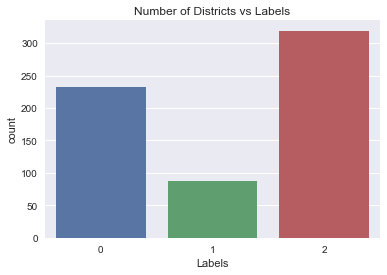

In [16]:
sns.countplot(merged.Labels).set_title("Number of Districts vs Labels");

In [17]:
ParityCols.append("Labels")
merged[ParityCols].groupby("Labels").mean() #You see the average of the bins per cluster

,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000
Labels,,,,,,,,,,,
0,0.113959,0.299290,0.258573,0.557863,0.072881,0.062185,0.135066,0.057872,0.075912,0.133785,0.060018
1,0.049972,0.186636,0.225486,0.412123,0.128582,0.085574,0.214156,0.081820,0.124348,0.206169,0.117579
2,0.212172,0.401737,0.210928,0.612664,0.064395,0.046200,0.110595,0.024857,0.021625,0.046483,0.018207


In [18]:
merged[merged["District name"]=='Gurgaon'][ParityCols]

,Power_Parity_Less_than_Rs_45000,Power_Parity_Rs_45000_90000,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Labels
85,0.027358,0.130029,0.229804,0.359833,0.131638,0.124236,0.255874,0.070808,0.100097,0.170904,0.18571,1


![Gurgaon's clusters](picture.png)

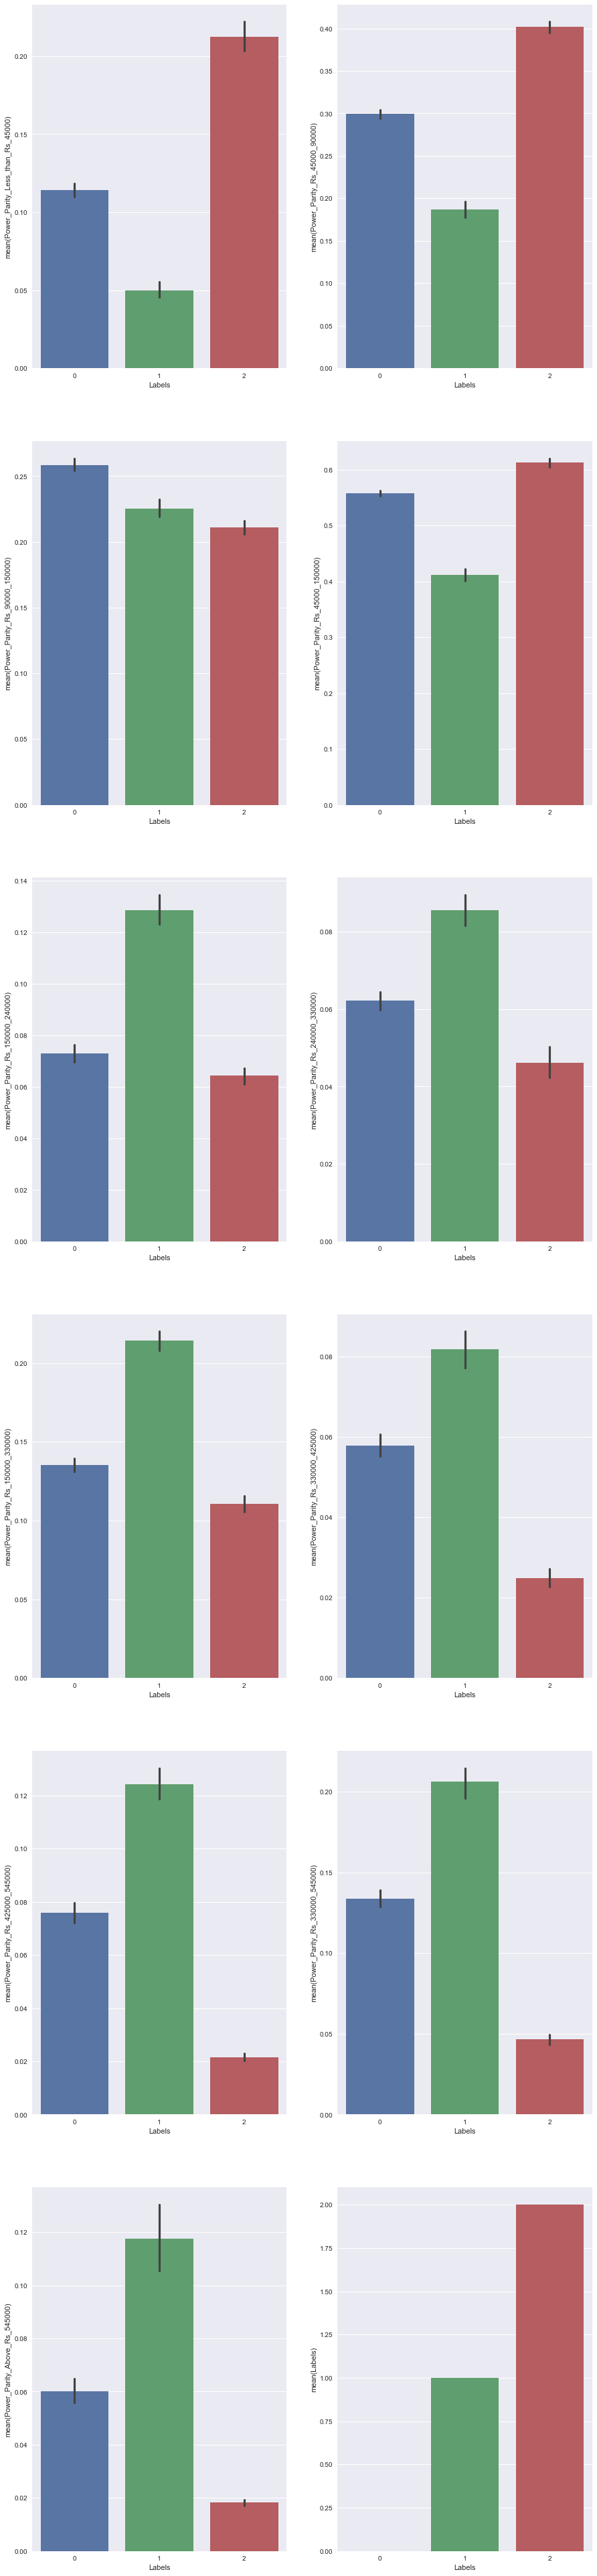

In [19]:
count =1
fig = plt.figure(figsize=(15,70))
for (num,col) in enumerate(divided.columns.values):
    ax = fig.add_subplot(6,2,num+1) #num+1 because enumerate is 0 indexed but subplots are 1 indexed
    sns.barplot(x='Labels',y=col,data=merged)
# plt.savefig('./foo.png') #Exports the file for the presentation
plt.show()

In [20]:
def correlation_matrix(df,target):
    '''Helper function for correlation matrix'''
    k = 15 #number of variables for heatmap
    corrmat = df.corr() #Create a correlation matrix
    cols = corrmat.nlargest(k, target)[target].index #Find the 10 highest correlations
    cm = np.corrcoef(df[cols].values.T)
    fig, ax = plt.subplots() #Plot this as a heatmap
    fig.set_size_inches(20,20)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, \
                     yticklabels=cols.values, xticklabels=cols.values,ax=ax)
    plt.savefig('./corrmat.png')
    plt.show()
# Standard ranked correlation function that I always use in every dataset

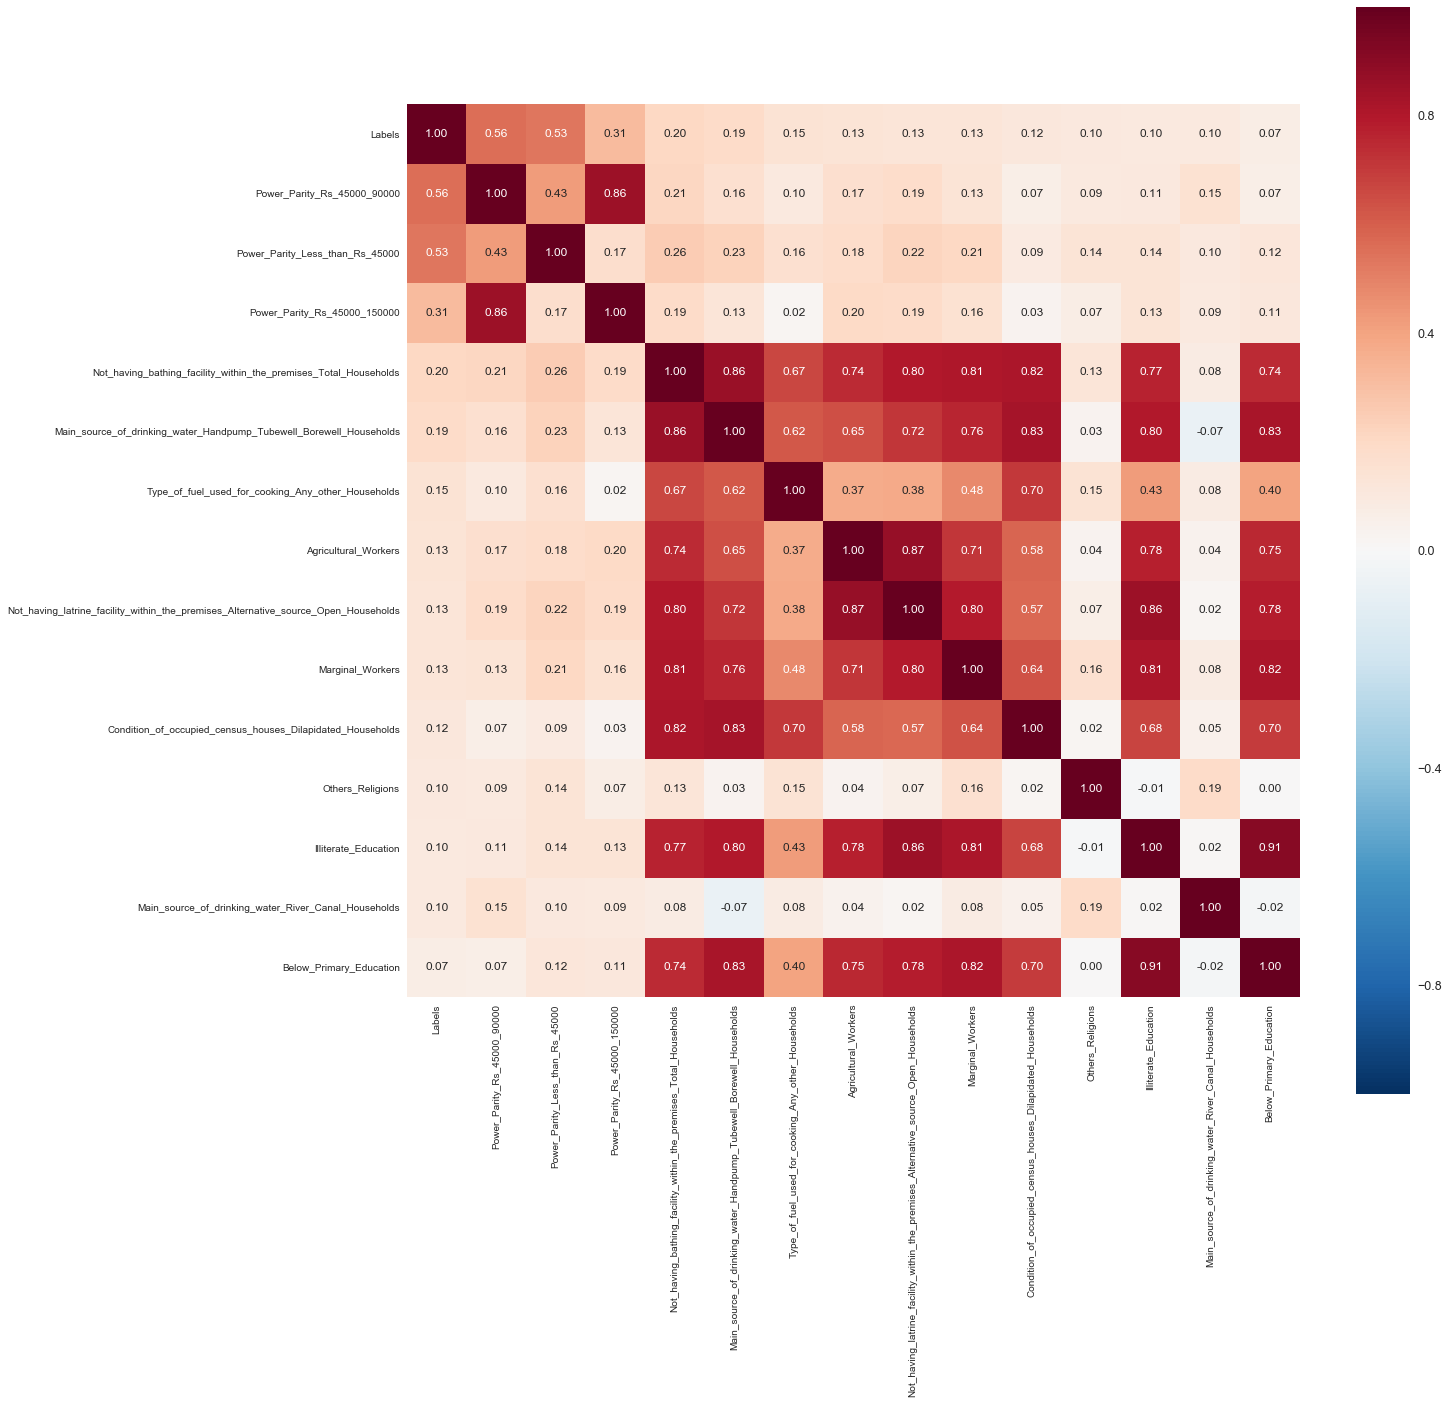

In [21]:
correlation_matrix(merged,"Labels")

## Phone Data

In [22]:
phonedata = pd.read_csv("PossibleDataSets/mobile_price.csv",names=["model","price"])
phonedata.info()
# Read phone Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5505 entries, 0 to 5504
Data columns (total 2 columns):
model    5505 non-null object
price    5505 non-null int64
dtypes: int64(1), object(1)
memory usage: 86.1+ KB


In [23]:
phonedata.describe()

,price
count,5505.000000
mean,5749.702452
std,8089.437717
min,399.000000
25%,1288.000000
50%,3349.000000
75%,6900.000000
max,102000.000000


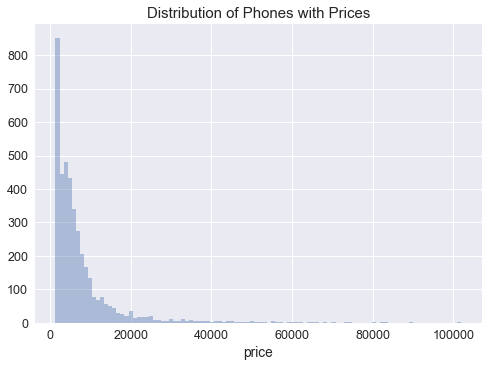

In [24]:
onlysmartphones = pd.DataFrame(phonedata.loc[phonedata['price']>=1300]) 
#1300 INR was the cheapest smartphone on the website
fig, ax = plt.subplots()
sns.distplot(onlysmartphones.price,bins=100,kde=False,rug=False,ax=ax).set_title("Distribution of Phones with Prices")
# plt.xlim(1300,20000)
plt.show()


In [25]:
model = KMeans(n_clusters=3)
# Kmeans doesn't like 1 dimensional series so we reshape it to a numpy array
model.fit(onlysmartphones.price.reshape(-1,1))
onlysmartphones['Labels']= model.labels_

/home/karmanya/anaconda3/envs/MLIntel/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [26]:
phonedata.loc[phonedata['price']<=1300].count()

model    1464
price    1464
dtype: int64

In [27]:
onlysmartphones.groupby("Labels").describe()

price
Labels                     
0      count    3244.000000
       mean     4313.342787
       std      2306.439855
       min      1300.000000
       25%      2249.000000
       50%      3999.000000
       75%      5999.000000
       max      9799.000000
1      count     133.000000
       mean    44312.278195
       std     14254.611129
       min     29845.000000
       25%     33280.000000
       50%     39999.000000
       75%     50000.000000
       max    102000.000000
2      count     677.000000
       mean    15343.450517
       std      4837.880193
       min      9849.000000
       25%     11499.000000
       50%     13991.000000
       75%     18000.000000
       max     28999.000000

Just a breakdown of the different ranges for each cluster label

In [28]:
# Sample function for heuristic grouping
def samplefunc(district_cluster,phone_cluster):
    #Expensive Cluster for phones Label 1 is most expensive, 0 is cheapest, 2 is average
    #Wealthy cluster for districts are 1 is wealthy, 0 is average and 2 is low income. 
    if district_cluster == 1 and phone_cluster == 1:
        return 1
    elif district_cluster ==0 or phone_cluster == 2:
        return 2
    else:
        return 3
#1 is wealthy bracket, 2 is average bracket 3 is low bracket. 

## Questions/Comments

# Thank You